In [3]:
import iofunctions as iof
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import numpy as np

from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from scipy.special import stdtr

import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


warnings.filterwarnings('ignore')
plt.style.use('ggplot')

mergedSpineDFMetaComplete = pd.read_excel('output/mergedSpineDFMetaComplete.xlsx','Sheet1')

mergedSpineDFMetaNormalApical = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete['oddType'] == "Normal")&(mergedSpineDFMetaComplete.dendriteType=="apical")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()
mergedSpineDFMetaNormalBasal = mergedSpineDFMetaComplete[(mergedSpineDFMetaComplete['oddType'] == "Normal")&(mergedSpineDFMetaComplete.dendriteType=="basal")&(mergedSpineDFMetaComplete.pyramidalLayer=="l5")].drop_duplicates()

In [111]:
import scipy.cluster
from numpy import array

#1 "Spine Length, um"
#2 "Head Width, um"
#3 "Straightness"
clusteringRawInput = mergedSpineDFMetaNormalApical[["Spine Length, um","Head Width, um","Straightness"]].as_matrix()
print(clusteringRawInput)
whitened = scipy.cluster.vq.whiten(clusteringRawInput)
print(whitened)



[[ 2.04637   1.03451   0.999089]
 [ 3.15515   1.103     0.983539]
 [ 2.24407   2.14697   0.997549]
 ..., 
 [ 2.00111   1.22988   0.972127]
 [ 2.06518   1.11854   0.996846]
 [ 1.02872   1.07155   1.      ]]
[[  2.37862504   1.16313722  25.57536557]
 [  3.66743003   1.24014302  25.17730601]
 [  2.60842423   2.41391647  25.5359436 ]
 ..., 
 [  2.32601649   1.38279882  24.8851738 ]
 [  2.40048909   1.25761521  25.51794772]
 [  1.1957462    1.20478264  25.59868598]]


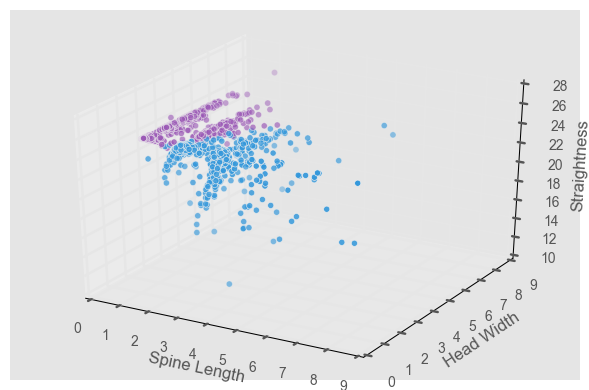

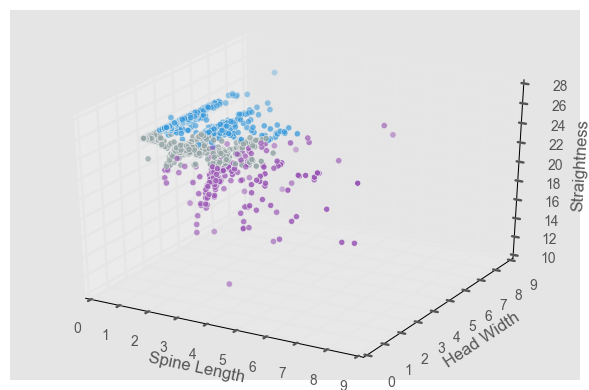

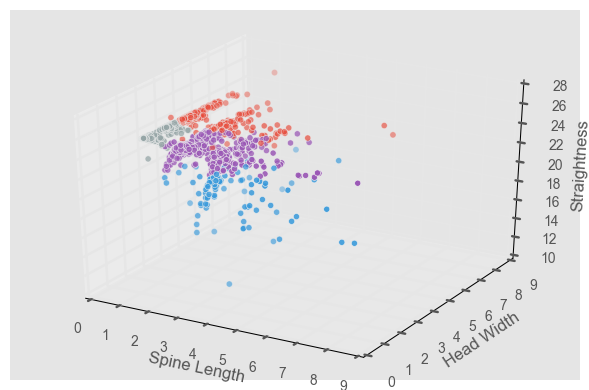

In [117]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import random

kclusters = 3
def plotclusters(whitened,kclusters):
    #plot clustering results on the scatterplot
    
    centroids, clusters = scipy.cluster.vq.kmeans2(whitened, kclusters, 1000)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    x = whitened[:,0]
    y = whitened[:,1]
    z = whitened[:,2]
    
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
    colors = []
    
    for index, cluster in enumerate(clusters):
        colors.append(flatui[int(cluster)])
    
    ax.scatter(x, y, z, c=colors, marker='o')
    
    ax.set_xlabel('Spine Length')
    ax.set_ylabel('Head Width')
    ax.set_zlabel('Straightness')
    
    plt.savefig("3dscatter-k"+str(kclusters)+".png")
    
for kclusters in range(2,6):
    plotclusters(whitened,kclusters)

In [109]:
absas = []
for index, cluster in enumerate(clusters):
    absas.append(flatui[int(cluster)])